[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sophiehuang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sophiehuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


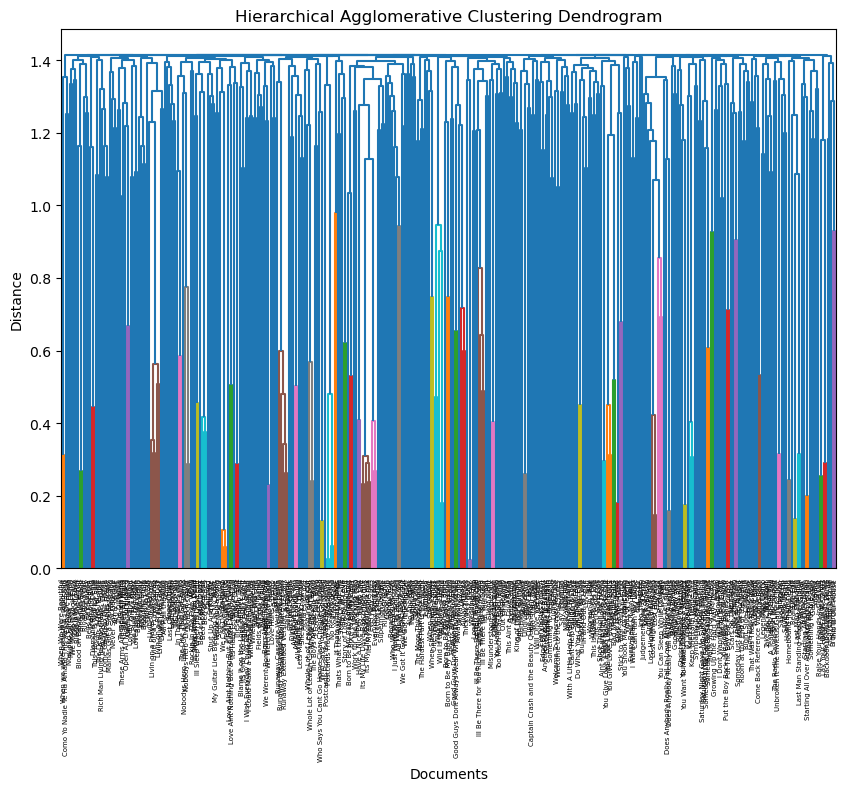

Cluster results saved to cluster_results.txt


In [7]:
import os
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 確保已安裝NLTK資料集
nltk.download('punkt')
nltk.download('stopwords')

# 1. 文字前處理函數
def preprocess_text(text):
    # 移除第三行
    lines = text.split('\n')
    if len(lines) > 2:
        text = '\n'.join(lines[:2] + lines[3:])
    # 轉換為小寫
    text = text.lower()
    # 移除標點符號
    text = text.translate(str.maketrans('', '', string.punctuation))
    # 移除指定單詞和停用詞
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word != 'embed']
    return ' '.join(tokens)

# 從資料夾中讀取文件
folder_path = "/Users/sophiehuang/Documents/113-1/113-1-IRTM/Final_Project/lyrics/bon_jovi"  # 指定文件所在資料夾路徑
corpus = []
file_names = []
for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_names.append(os.path.splitext(file_name)[0])  # 移除副檔名
        with open(os.path.join(folder_path, file_name), 'r', encoding='utf-8') as file:
            corpus.append(file.read())

# 文字前處理
processed_corpus = [preprocess_text(doc) for doc in corpus]

# 2. 計算TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_corpus)

# 3. 使用 HAC (Hierarchical Agglomerative Clustering)
# 使用 Complete Linkage
linkage_matrix = linkage(tfidf_matrix.toarray(), method='complete')

# 繪製樹狀圖
def plot_dendrogram(linkage_matrix, file_names):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix, labels=file_names)
    plt.title("Hierarchical Agglomerative Clustering Dendrogram")
    plt.xlabel("Documents")
    plt.ylabel("Distance")
    plt.show()

plot_dendrogram(linkage_matrix, file_names)

# 分群
k = 16  # 指定群組數
clusters = fcluster(linkage_matrix, k, criterion='maxclust')

# 組織分群結果
cluster_dict = {}
for file_name, cluster in zip(file_names, clusters):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = []
    cluster_dict[cluster].append(file_name)

# 將結果儲存到txt檔案
output_file = "cluster_results.txt"
with open(output_file, 'w', encoding='utf-8') as f:
    for cluster, docs in cluster_dict.items():
        f.write(f"{cluster} " + " ".join(docs) + "\n")

print(f"Cluster results saved to {output_file}")
